In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [3]:
df_cyber = pd.read_csv('china_cyber.csv', parse_dates=True, index_col='Date')

In [4]:
df_cyber.head()

,status,infected_computers,defaced_websites,defaced_gov,backdoor_websites,backdoor_gov,phishing_webites,new_vulnerabilities,high_risk
Date,,,,,,,,,
2019-01-06,Good,0.200,669.0,52.0,553,10,2924.0,138.0,44.0
2019-01-13,Good,0.190,690.0,41.0,805,17,3634.0,225.0,68.0
2019-01-20,Good,0.210,638.0,43.0,561,9,1718.0,375.0,110.0
2019-01-27,Good,0.240,70.0,42.0,600,3,1260.0,177.0,65.0
2019-02-03,Excellent,0.233,618.0,34.0,424,5,320.0,205.0,51.0


In [5]:
df_cyber['status'].astype('category').head()

Date
2019-01-06         Good
2019-01-13         Good
2019-01-20         Good
2019-01-27         Good
2019-02-03    Excellent
Name: status, dtype: category
Categories (3, object): [Excellent, Fair, Good]

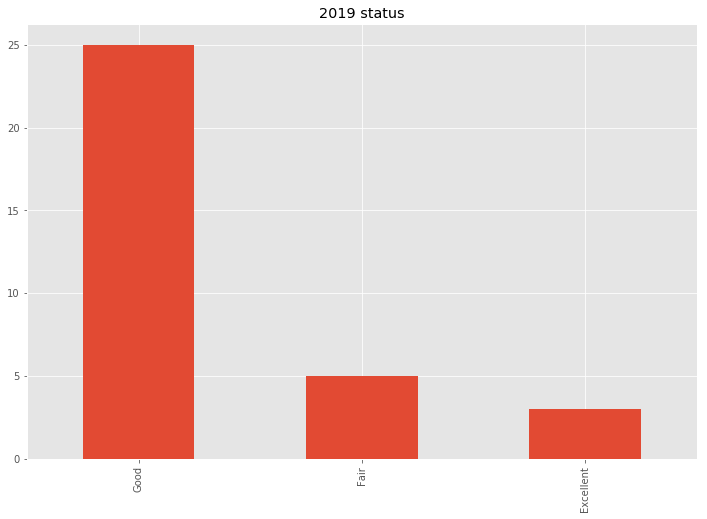

In [6]:
_ = df_cyber['status'].value_counts().plot(kind='bar')
_ = plt.title('2019 status')

In [9]:
df_cyber.columns

Index(['status', 'infected_computers', 'defaced_websites', 'defaced_gov',
       'backdoor_websites', 'backdoor_gov', 'phishing_webites',
       'new_vulnerabilities', 'high_risk'],
      dtype='object')

In [12]:
df_cyber['status_color'] = df_cyber.status.map({'Good': 'blue', 'Fair': 'orange', 'Excellent': 'green'})

Fill missing values with means

In [19]:
df_cyber.fillna(df_cyber.mean(), inplace=True)

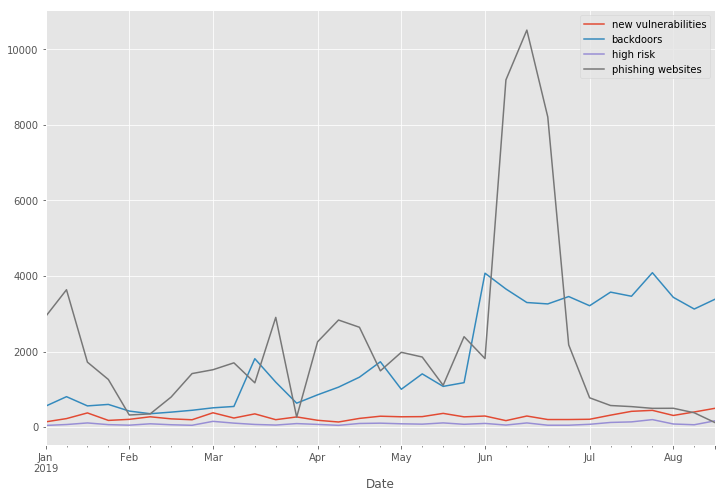

In [66]:
ax = df_cyber['new_vulnerabilities'].plot(label='new vulnerabilities')
_ = df_cyber['backdoor_websites'].plot(ax=ax, label='backdoors')
_ = df_cyber['high_risk'].plot(ax=ax, label='high risk')
_ = df_cyber['phishing_webites'].plot(ax=ax, label='phishing websites')
_ = plt.legend()

In [67]:
def plot_metric(column, kind):
    df_cyber[column].plot(kind=kind)
    plt.title(str(column))

In [68]:
df_cyber.columns

Index(['status', 'infected_computers', 'defaced_websites', 'defaced_gov',
       'backdoor_websites', 'backdoor_gov', 'phishing_webites',
       'new_vulnerabilities', 'high_risk', 'status_color'],
      dtype='object')

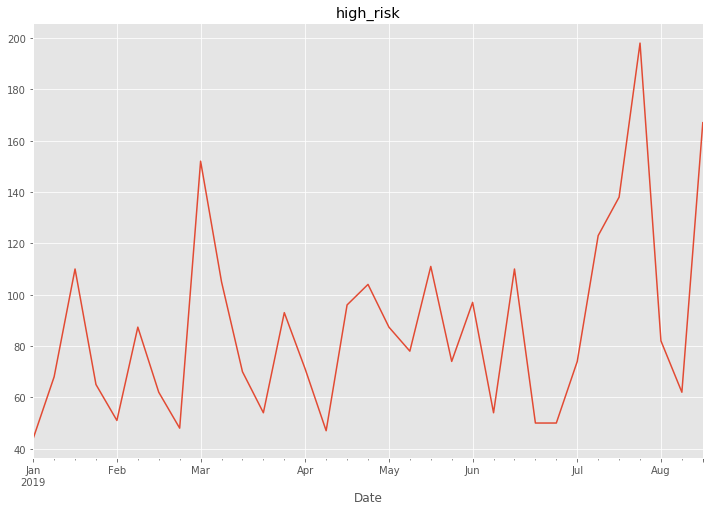

In [22]:
plot_metric('high_risk', 'line')

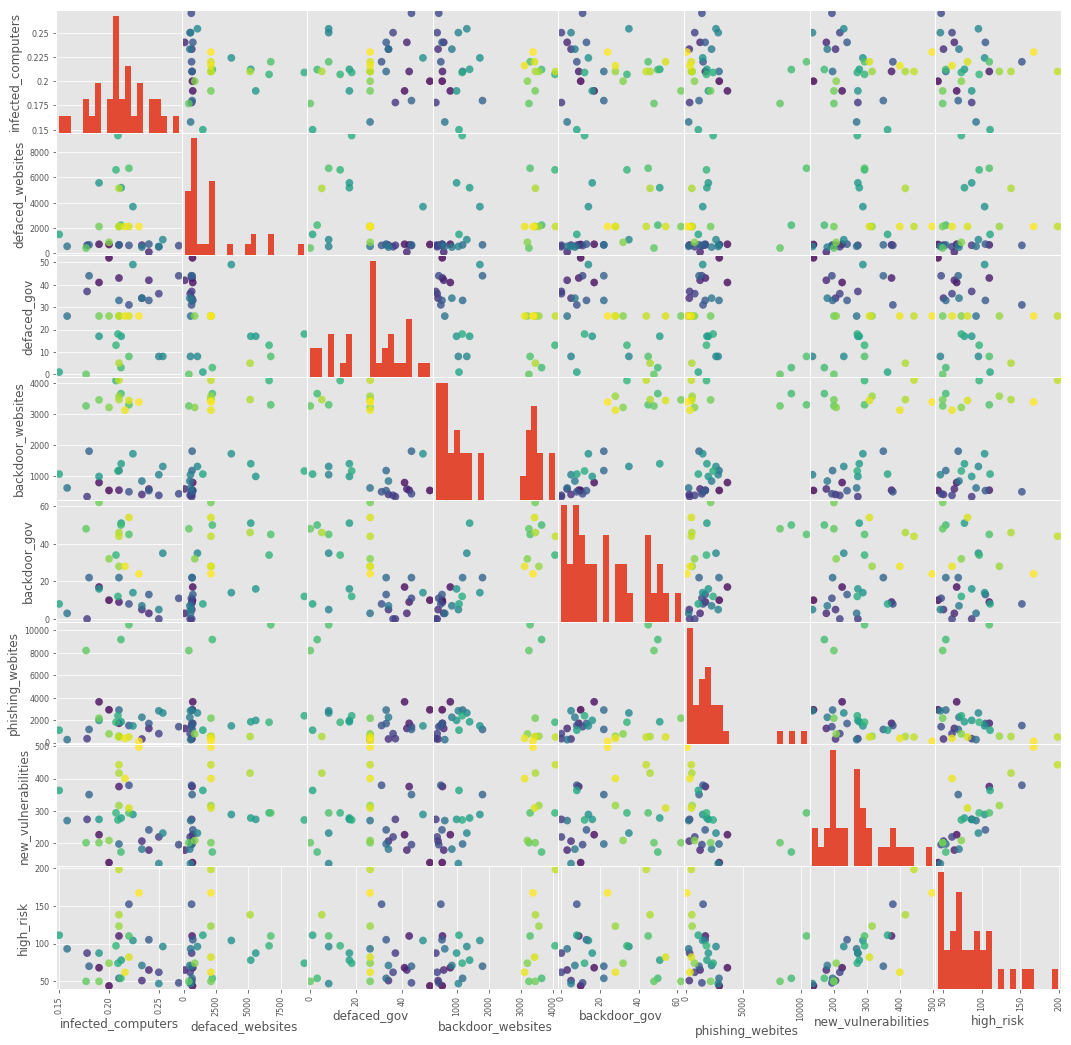

In [80]:
cyber = pd.plotting.scatter_matrix(df_cyber,figsize=(18,18), c=df_cyber.index, marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

In [57]:
corr = df_cyber.corr()

In [65]:
corr

,infected_computers,defaced_websites,defaced_gov,backdoor_websites,backdoor_gov,phishing_webites,new_vulnerabilities,high_risk
infected_computers,1.000000,-0.074346,0.183019,-0.139757,-0.110691,-0.042039,-0.202284,-0.057697
defaced_websites,-0.074346,1.000000,-0.408117,0.360977,0.347763,0.193812,0.256445,0.201247
defaced_gov,0.183019,-0.408117,1.000000,-0.478239,-0.502496,-0.432935,-0.099927,-0.126819
backdoor_websites,-0.139757,0.360977,-0.478239,1.000000,0.817551,0.230893,0.370756,0.314348
backdoor_gov,-0.110691,0.347763,-0.502496,0.817551,1.000000,0.376525,0.163169,0.113178
phishing_webites,-0.042039,0.193812,-0.432935,0.230893,0.376525,1.000000,-0.350806,-0.252031
new_vulnerabilities,-0.202284,0.256445,-0.099927,0.370756,0.163169,-0.350806,1.000000,0.817491
high_risk,-0.057697,0.201247,-0.126819,0.314348,0.113178,-0.252031,0.817491,1.000000


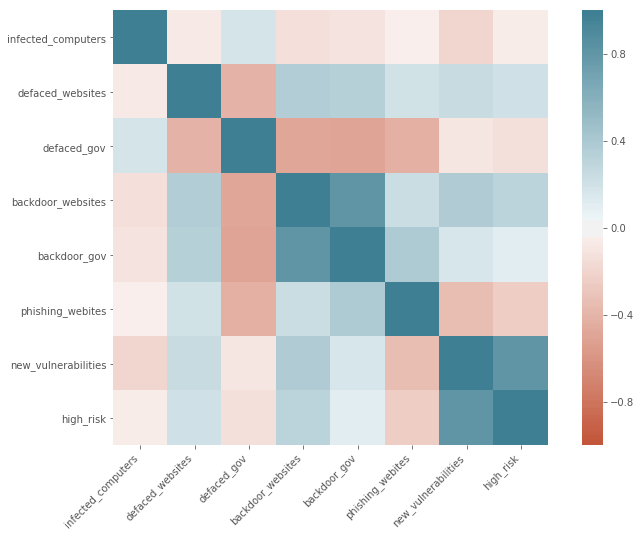

In [63]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
_ = ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

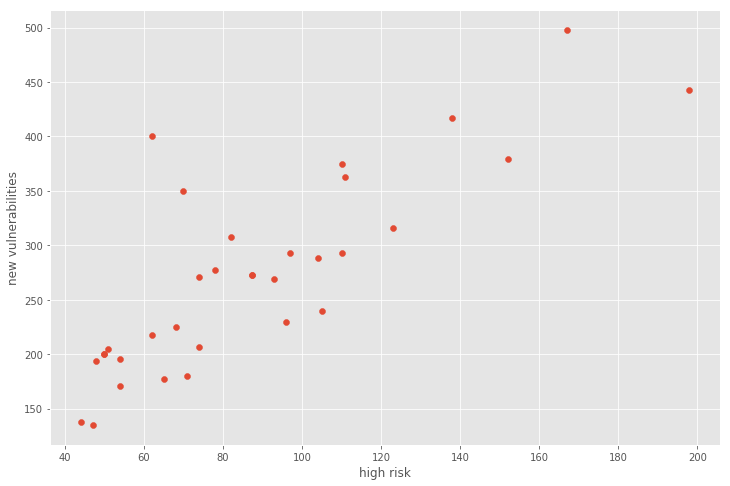

In [60]:
_ = plt.scatter(df_cyber['high_risk'], df_cyber['new_vulnerabilities'])
_ = plt.xlabel('high risk')
_ = plt.ylabel('new vulnerabilities')

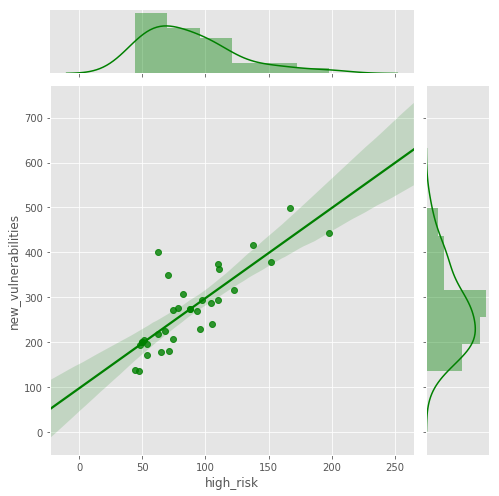

In [61]:
g = sns.jointplot("high_risk", "new_vulnerabilities", data=df_cyber, kind="reg", color="g", height=7)

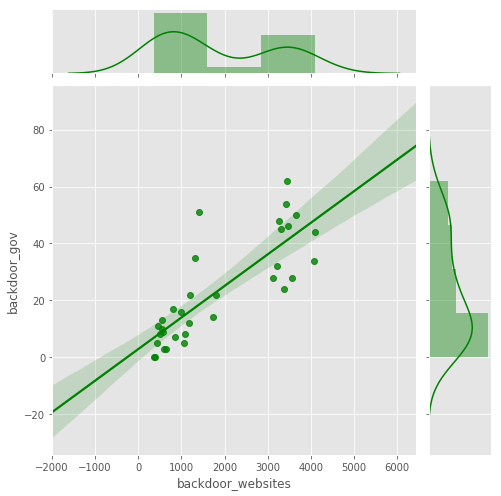

In [62]:
g2 = sns.jointplot("backdoor_websites", "backdoor_gov", data=df_cyber, kind="reg", color="g", height=7)